In [95]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [107]:
def plot_results(dir_name_list, key_list, label_list):
    
    stats = {}
    
    for dir_name in dir_name_list:
        
        stats[dir_name] = {}
        for key in key_list:
            stats[dir_name][key] = []

        for file in os.listdir(dir_name):
            
            df = pd.read_pickle(dir_name + file)
            for key in key_list:
                
                try:
                    tmp = df[key].tolist()
                    stats[dir_name][key].append(tmp)
                except:
                    print("key not in df")
                    return
                
    
    n = len(key_list)
    plt.figure(figsize=(15, 8))
    cpt=0
    
    for key in key_list:
        plt.subplot(n,1,cpt+1)
        cpt += 1
        plt.title(key)
        
        cpt_ = 0
        for dir_name in dir_name_list:
            plt.plot(np.mean(stats[dir_name][key], axis=0), label=label_list[cpt_])
            cpt_ += 1
            
        plt.legend()

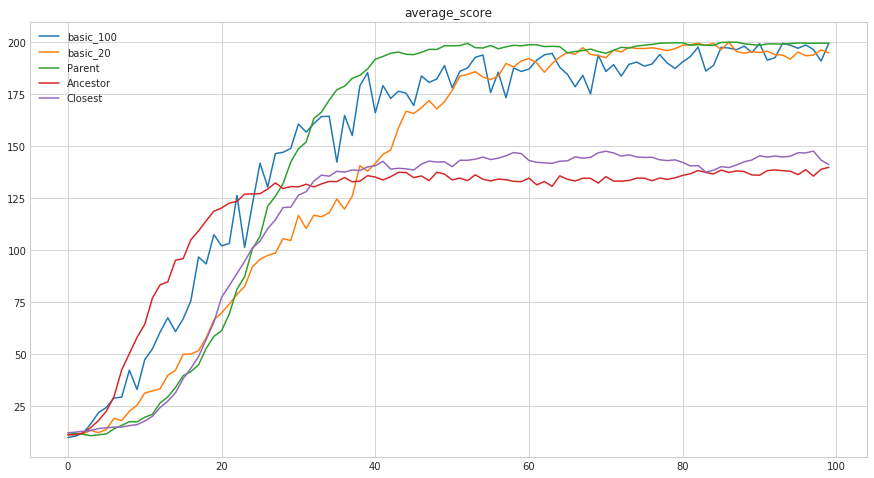

In [108]:
dir_name_list = [
    "gym_experiments/CartPole-v0_CMAES_BasicSampler_alpha_0.7_popsize_20_18h1m52s/",
    "gym_experiments/CartPole-v0_CMAES_BasicSampler_alpha_0_popsize_100_13h47m1s/",
    "gym_experiments/CartPole-v0_CMAES_ParentSampler_alpha_0.7_popsize_100_15h35m14s/",
    "gym_experiments/CartPole-v0_CMAES_BestAncestorSampler_alpha_0.7_popsize_100_15h51m5s/",
    "gym_experiments/CartPole-v0_CMAES_ClosestSampler_alpha_0.7_popsize_100_10h25m33s/"
]
key_list = ["average_score"]
label_list = ["basic_100", "basic_20", "Parent", "Ancestor", "Closest"]
plot_results(dir_name_list, key_list, label_list)
plt.savefig("CartPolev0_convergence.png")

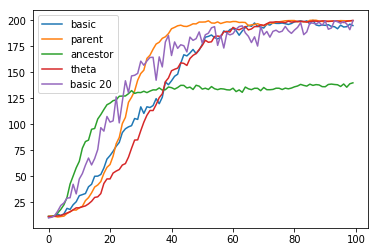

In [50]:
plt.plot(np.mean(average_score_basic, axis=0), label="basic")
plt.plot(np.mean(average_score_parent, axis=0), label="parent")
plt.plot(np.mean(average_score_ancestor, axis=0), label="ancestor")
plt.plot(np.mean(average_score_theta, axis=0), label="theta")
plt.plot(np.mean(average_score_basic_20, axis=0), label="basic 20")
plt.legend()
plt.show()